In [1]:
import glob
from collections import Counter

import skimage.io as io
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

# create generators

In [2]:
frames = glob.glob('/root/data/phytoplankton/raw/*/*/*.jpg')
print("Total number of frames: {}".format(len(frames)))

Total number of frames: 155349


In [3]:
cter = Counter([f.split('/')[-2] for f in frames]).most_common()

In [4]:
# at least 100 images
classes =[c[0] for c in cter if c[1] > 100]
nclasses = len(classes)
classes_counter = {c[0]: c[1] for c in cter}
print('Numer of classes {}'.format(nclasses))

Numer of classes 55


In [5]:
train_class_dict = {}
val_class_dict = {}
for f in frames:
    cl = f.split('/')[-2]
    if cl not in train_class_dict:
        train_class_dict[cl] = []
        val_class_dict[cl] = []
    if len(train_class_dict[cl]) > 0.85*classes_counter[cl]:
        val_class_dict[cl].append(f)
    else:
        train_class_dict[cl].append(f)

In [6]:
input_size = (64, 64, 3)
batch_size = 32

In [13]:
def generator(class_dict, batch_size, input_size):
    while True:
        xb = np.zeros((batch_size, input_size[0], input_size[1], input_size[2]))
        yb = np.zeros((batch_size, nclasses))
        i = 0
        while i < batch_size:
            rclass = np.random.choice(classes)
            rpath = np.random.choice(class_dict[rclass])
            image = io.imread(rpath)
            
            try:
                # remove black
                imgsum = np.sum(image, axis=2)
                ind0 = np.where(np.sum(imgsum, axis=1) < 5000)[0]
                ind1 = np.where(np.sum(imgsum, axis=0) < 5000)[0]
                if len(ind0) > 0 and len(ind1) >0:
                    new_im = image[:ind0.min(), :ind1.min(), :]
                elif len(ind0) > 0 and len(ind1) == 0:
                    new_im = image[:ind0.min(), :, :]
                elif len(ind0) == 0 and len(ind1) > 0:
                    new_im = image[:, :ind1.min(), :]
                else:
                    new_im = image

                rimage = resize(new_im, input_size)
                # rimage = resize(image, input_size)
                xb[i, ...] = rimage
                yb[i, classes.index(rclass)] = 1
                i += 1
            except:
                print('problem')
        yield xb, yb

In [14]:
train_gen = generator(train_class_dict, batch_size, input_size)
val_gen = generator(val_class_dict, batch_size, input_size)

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


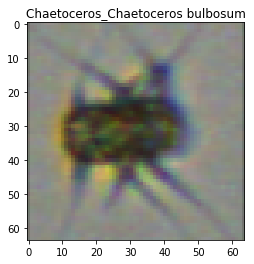

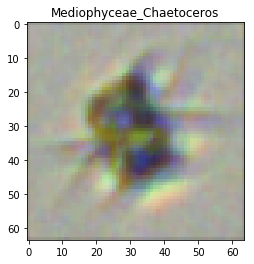

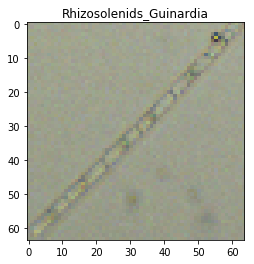

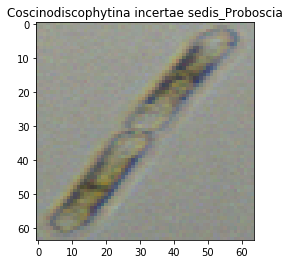

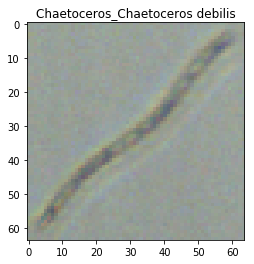

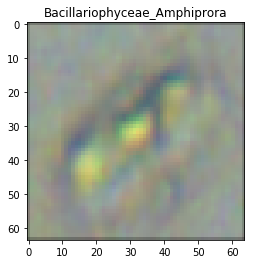

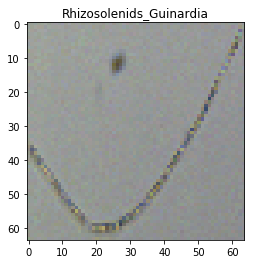

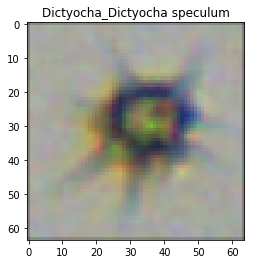

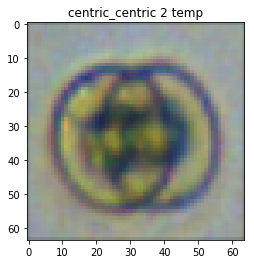

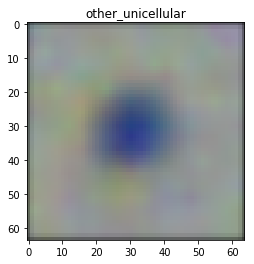

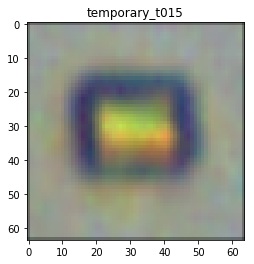

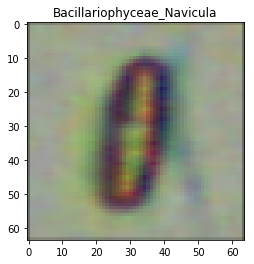

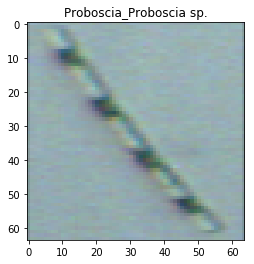

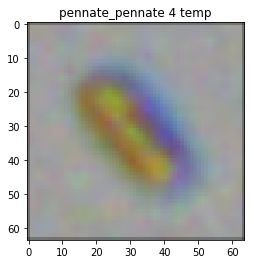

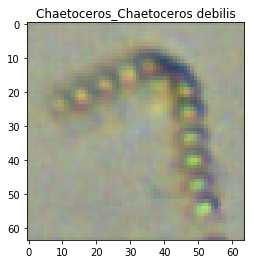

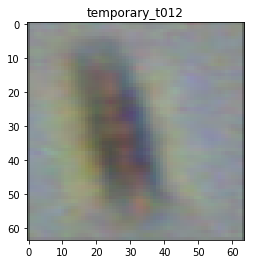

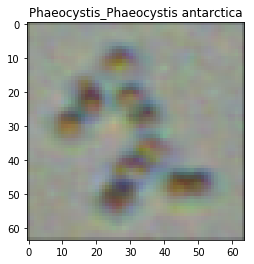

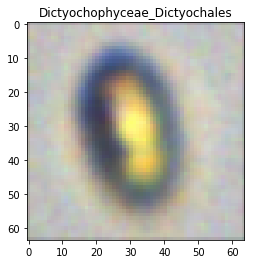

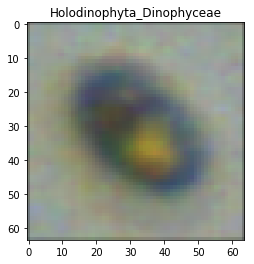

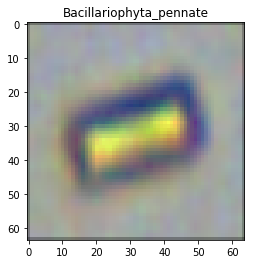

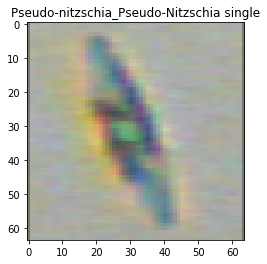

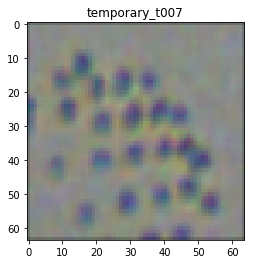

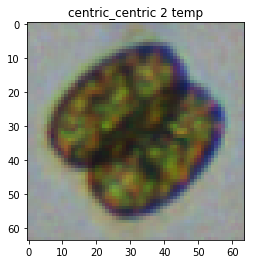

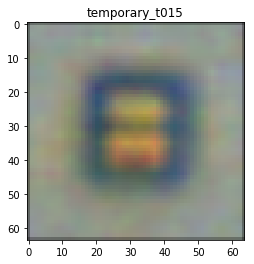

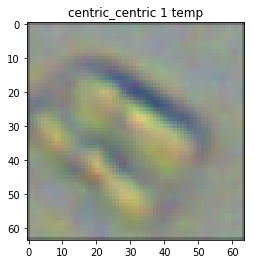

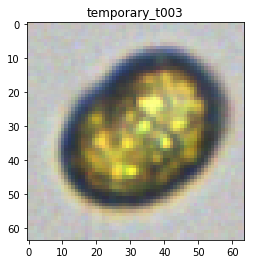

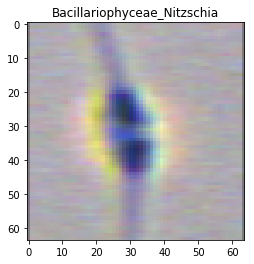

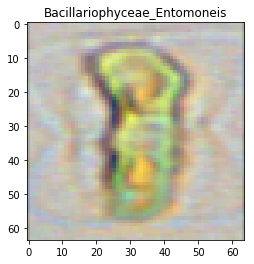

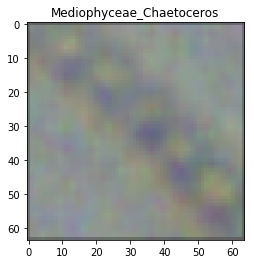

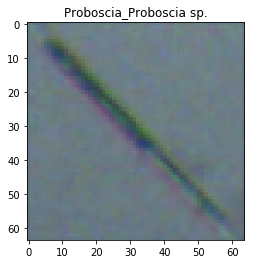

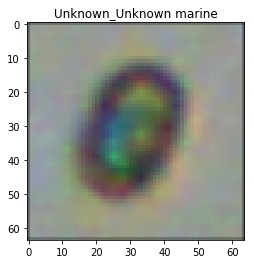

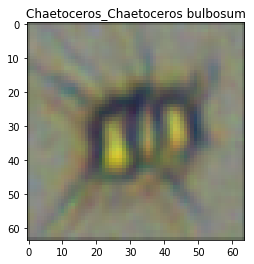

In [15]:
xb, yb = next(train_gen)
for i in range(batch_size):
    plt.imshow(xb[i, ...])
    plt.title(classes[np.argmax(yb[i, ...])])
    plt.show()

# error analysis

In [16]:
import keras
import os

In [17]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [18]:
model = keras.models.load_model("/root/data/phytoplankton/models/model_v0.h5")

In [30]:
error_count = {}
error_count_5 = {}
for i in range(10):
    xb, yb = next(val_gen)
    yb_pred = model.predict_on_batch(xb)
    for j in range(batch_size):
        class_index = int(np.argmax(yb[j, :]))
        phyto_class = classes[class_index]
        if np.argmax(yb_pred[j, :]) != np.argmax(yb[j, :]):
            print("error")
            if phyto_class not in error_count:
                error_count[phyto_class] = 0
            error_count[phyto_class] += 1
                
        if np.argmax(yb[j, :]) not in np.argsort(yb_pred[j, :])[::-1][:5]:
            # print("error5")
            if phyto_class not in error_count_5:
                error_count_5[phyto_class] = 0
            error_count_5[phyto_class] += 1

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


error
error
error5
error
error5
error
error5
error
error
error5
error
error5
error
error5
error
error5
error
error5
error
error
error
error
error5
error
error5
error
error5
error
error5
error
error5
error
error5
error
error5
error
error
error5
error
error5
error
error
error5
error
error5
error
error5
error
error5
error
error5
error
error5
error
error
error5
error
error5
error
error
error5
error
error
error5
error
error5
error
error5
error
error5
error
error5
error
error5
error
error5
error
error5
error
error5
error
error5
error
error5
error
error5
error
error5
error
error5
error
error5
error
error
error5
error
error
error5
error
error5
error
error5
error
error5
error
error5
error
error
error5
error
error
error5
error
error5
error
error5
error
error5
error
error5
error
error5
error
error5
error
error
error5
error
error5
error
error
error5
error
error
error5
error
error5
error
error5
error
error5
error
error5
error
error
error5
error
error5
error
error5
error
error5
error
error5
error
er

array([21, 28, 54, 53, 30])